# Challenge 3

# Introducción

En el ámbito de la bioinformática y la química computacional, el uso de métodos de aprendizaje automático se ha vuelto fundamental para el análisis y la predicción de diversas propiedades moleculares. Entre ellas, destaca el uso de Support Vector Machines (SVM), ya que se ha demostrado que produce un error de predicción más bajo en comparación con los clasificadores basados en otros métodos como las redes neuronales artificiales, especialmente cuando se consideran una gran cantidad de características [1].

En este challenge, se aborda el uso de un algoritmo de SVM para clasificar la presencia o ausencia de grupos quelantes. El conjunto de datos utilizado en este estudio proviene de la Siderophores Database, una colección de 221 sideróforos, que son compuestos orgánicos vitales en la captación de hierro por microorganismos. Se busca construir un modelo de SVM que permita la clasificación haciendo uso de las propiedades moleculares.

# Metodología

In [1]:
#@title import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/inefable12/siderophores_database/main/Siderophore_DB1.csv')

In [3]:
# Se unen ambos df teniendo como referencia la columna 'ID'
df = pd.merge(df1, df2, on='ID', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Columns: 132 entries, ID to fr_phenol_noOrthoHbond
dtypes: bool(1), float64(86), int64(39), object(6)
memory usage: 226.5+ KB


In [4]:
# Se visualiza los datatype de cada columna
for d in ['bool', 'float64', 'int64', 'object']:
  dataype_columns = df.select_dtypes(d)
  print(f'{d}\t{dataype_columns.columns}')

bool	Index(['validate smiles'], dtype='object')
float64	Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge',
       'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2',
       'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGLO',
       'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT',
       'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v',
       'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Kappa1', 'Kappa2',
       'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11',
       'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3',
       'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1',
       'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6',
       'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA11

In [5]:
# Se escogen los posibles features
# Coinciden con las columnas en df2 (Siderophore_DB1.csv) con la excepción de ID
featureslist=df2.columns[1:].tolist()
print(featureslist)

['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGLO', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA11', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'TPSA', 'EState_VSA1', 'EState_VSA10

In [6]:
# Se escogen los posibles targets
# No se necesitará la data de tipo objeto ni bool para la SVM (de df1)
targetslist=df1.columns[1:].tolist()
nofeat_columns = df.select_dtypes('object').columns.tolist()+ df.select_dtypes('bool').columns.tolist()
targetslist=[x for x in targetslist if x not in nofeat_columns]
print(targetslist)

['hydroxamate', 'catecholate', 'a-hydroxycarboxylate', 'carboxylate', 'phenolate', 'citrate', 'other']


In [7]:
# Se define las filas que se utilizarán para mostrar el df ahora en adelante
cols=featureslist+targetslist

In [8]:
# Se evalúa si las columnas seleccionadas tienen problemas de datatype
df[cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Columns: 125 entries, MaxEStateIndex to other
dtypes: float64(86), int64(39)
memory usage: 215.9 KB


In [9]:
df[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
MaxEStateIndex,221.0,14.361458,1.306650,9.667832,13.693037,14.222851,15.424962,16.647474
MinEStateIndex,221.0,-5.557024,1.186967,-7.433673,-6.290073,-5.571034,-5.211695,-0.881916
MaxAbsEStateIndex,221.0,14.361458,1.306650,9.667832,13.693037,14.222851,15.424962,16.647474
MinAbsEStateIndex,221.0,1.244646,0.508051,0.011382,1.036932,1.280840,1.618549,2.220550
qed,221.0,0.151045,0.203659,0.007004,0.030619,0.058700,0.158075,0.881757
...,...,...,...,...,...,...,...,...
a-hydroxycarboxylate,221.0,0.104072,0.407912,0.000000,0.000000,0.000000,0.000000,2.000000
carboxylate,221.0,0.389140,0.627165,0.000000,0.000000,0.000000,1.000000,4.000000
phenolate,221.0,0.090498,0.302940,0.000000,0.000000,0.000000,0.000000,2.000000
citrate,221.0,0.099548,0.342517,0.000000,0.000000,0.000000,0.000000,2.000000


In [10]:
# Suma del recuento de objetos nulos en todas las columnas utilizadas
np.sum(pd.isnull(df[cols]).sum())

0

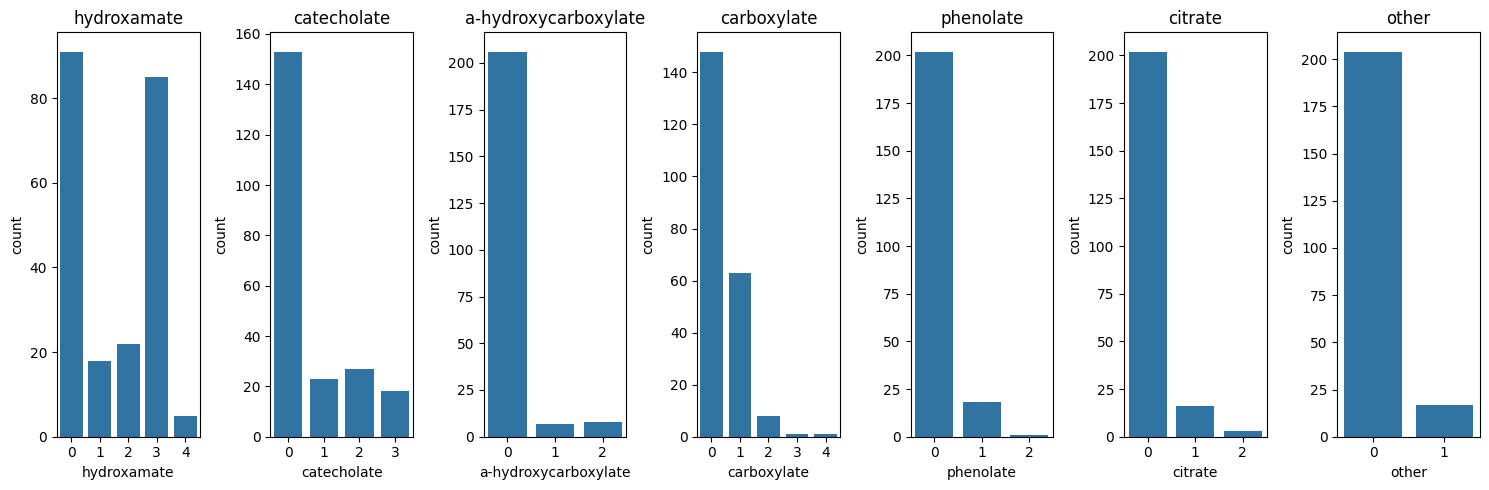

In [11]:
# Observar la distribución de los targets
fig, axes = plt.subplots(nrows=1, ncols=len(targetslist), figsize=(15, 5))

for i, column in enumerate(targetslist):
    sns.countplot(x=column, data=df[cols], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [12]:
# 'a-hydroxycarboxylate','phenolate','citrate','other' están desbalanceados, por
# lo que no serán consideradas.
notarget=['a-hydroxycarboxylate','phenolate','citrate','other']
targetslist=[x for x in targetslist if x not in notarget]
print(targetslist)

['hydroxamate', 'catecholate', 'carboxylate']


In [13]:
# Por otro lado, del resto de columnas colo se considerará la presencia o
# ausencia de los grupos quelantes, debido a que también hay un desbalance
for col in targetslist:
  df[col+'_target'] = df[col].apply(lambda x: 1 if x > 0 else x)
targetslist=[x+'_target' for x in targetslist]
print(targetslist)

['hydroxamate_target', 'catecholate_target', 'carboxylate_target']


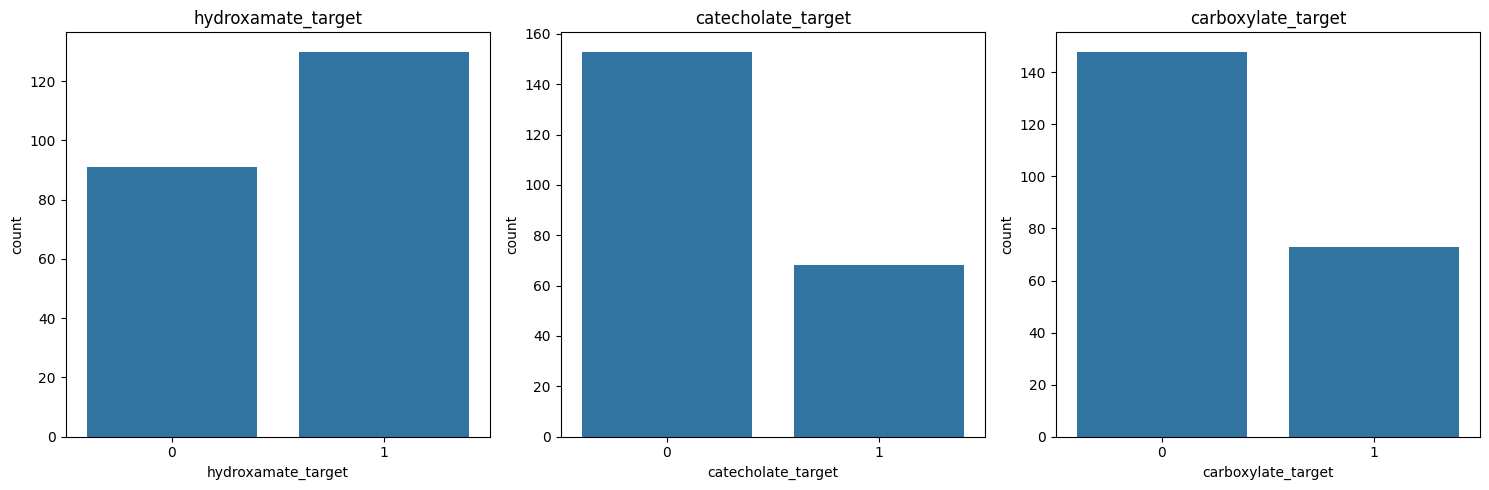

In [14]:
# Observar la nueva distribución de los targets
fig, axes = plt.subplots(nrows=1, ncols=len(targetslist), figsize=(15, 5))
for i, column in enumerate(targetslist):
    sns.countplot(x=column, data=df[targetslist], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [15]:
df_feat=df[featureslist]
df_feat.info()
df_feat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Columns: 118 entries, MaxEStateIndex to fr_phenol_noOrthoHbond
dtypes: float64(86), int64(32)
memory usage: 203.9 KB


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,...,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_amide,fr_benzene,fr_ester,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond
0,11.191262,-1.343472,11.191262,0.665370,0.522491,154.121,148.073,154.026609,58,0.339119,...,0,0,0,0,0,1,0,1,2,1
1,12.228676,-3.436129,12.228676,0.586755,0.522624,211.173,202.101,211.048072,80,0.322481,...,0,1,0,0,1,1,0,1,2,2
2,12.627825,-3.816337,12.627825,0.758838,0.442264,241.199,230.111,241.058637,92,0.328131,...,0,1,0,0,1,1,0,1,2,2
3,12.854441,-4.102795,12.854441,0.884463,0.468346,255.226,242.122,255.074287,98,0.328426,...,0,1,0,0,1,1,0,1,2,2
4,11.108779,-1.310880,11.108779,0.630759,0.610259,138.122,132.074,138.031694,52,0.338969,...,0,0,0,0,0,1,0,1,1,0


In [16]:
# Se hará una clasificación para cada target, es decir se intentará predecir la
# presencia o ausencia de cada grupo independientemente
df_target0=df[targetslist[0]]
df_target1=df[targetslist[1]]
df_target2=df[targetslist[2]]
df_target0.info()
df_target0.head()

<class 'pandas.core.series.Series'>
RangeIndex: 221 entries, 0 to 220
Series name: hydroxamate_target
Non-Null Count  Dtype
--------------  -----
221 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


0    0
1    0
2    0
3    0
4    0
Name: hydroxamate_target, dtype: int64

## Entrenamiento y predicción

In [17]:
#@title import libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
# undersampling
from imblearn.under_sampling import RandomUnderSampler

### hydroxamate_target

In [18]:
#@title no stratify, no undersampling
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target0, test_size=0.30, random_state=101)
model = SVC()
# Realizar validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

model.fit(X_train,y_train)

predictions = model.predict(X_test)

print('\nMatriz de confusión')
print(confusion_matrix(y_test,predictions))

print('\nReporte de clasificación')
print(classification_report(y_test,predictions))

Cross-validation scores: [0.61290323 0.61290323 0.67741935 0.70967742 0.63333333]
Mean cross-validation score: 0.649247311827957

Matriz de confusión
[[ 9 18]
 [ 3 37]]

Reporte de clasificación
              precision    recall  f1-score   support

           0       0.75      0.33      0.46        27
           1       0.67      0.93      0.78        40

    accuracy                           0.69        67
   macro avg       0.71      0.63      0.62        67
weighted avg       0.70      0.69      0.65        67



In [19]:
#@title stratify
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target0, test_size=0.30, random_state=101,stratify=df_target0)
model = SVC()
# Realizar validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

model.fit(X_train,y_train)

predictions = model.predict(X_test)

print('\nMatriz de confusión')
print(confusion_matrix(y_test,predictions))

print('\nReporte de clasificación')
print(classification_report(y_test,predictions))

Cross-validation scores: [0.64516129 0.58064516 0.67741935 0.64516129 0.76666667]
Mean cross-validation score: 0.663010752688172

Matriz de confusión
[[13 15]
 [ 6 33]]

Reporte de clasificación
              precision    recall  f1-score   support

           0       0.68      0.46      0.55        28
           1       0.69      0.85      0.76        39

    accuracy                           0.69        67
   macro avg       0.69      0.66      0.66        67
weighted avg       0.69      0.69      0.67        67



In [20]:
#@title undersampling

# undersampling
undersampler = RandomUnderSampler(random_state=42)
df_feat0_us, df_target0 = undersampler.fit_resample(df_feat, df_target0)

X_train, X_test, y_train, y_test = train_test_split(df_feat0_us, df_target0, test_size=0.30, random_state=101)

model = SVC()
# Realizar validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

model.fit(X_train,y_train)

predictions = model.predict(X_test)

print('\nMatriz de confusión')
print(confusion_matrix(y_test,predictions))

print('\nReporte de clasificación')
print(classification_report(y_test,predictions))

Cross-validation scores: [0.61538462 0.84615385 0.6        0.84       0.56      ]
Mean cross-validation score: 0.6923076923076923

Matriz de confusión
[[10 18]
 [ 8 19]]

Reporte de clasificación
              precision    recall  f1-score   support

           0       0.56      0.36      0.43        28
           1       0.51      0.70      0.59        27

    accuracy                           0.53        55
   macro avg       0.53      0.53      0.51        55
weighted avg       0.53      0.53      0.51        55



### catecholate_target

In [21]:
#@title no stratify, no undersampling
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target1, test_size=0.30, random_state=101)
model = SVC()
# Realizar validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

model.fit(X_train,y_train)

predictions = model.predict(X_test)

print('\nMatriz de confusión')
print(confusion_matrix(y_test,predictions))

print('\nReporte de clasificación')
print(classification_report(y_test,predictions))

Cross-validation scores: [0.67741935 0.67741935 0.67741935 0.67741935 0.66666667]
Mean cross-validation score: 0.675268817204301

Matriz de confusión
[[49  0]
 [18  0]]

Reporte de clasificación
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        49
           1       0.00      0.00      0.00        18

    accuracy                           0.73        67
   macro avg       0.37      0.50      0.42        67
weighted avg       0.53      0.73      0.62        67



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
#@title stratify
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target1, test_size=0.30, random_state=101,stratify=df_target1)
model = SVC()
# Realizar validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

model.fit(X_train,y_train)

predictions = model.predict(X_test)

print('\nMatriz de confusión')
print(confusion_matrix(y_test,predictions))

print('\nReporte de clasificación')
print(classification_report(y_test,predictions))

Cross-validation scores: [0.70967742 0.70967742 0.67741935 0.67741935 0.7       ]
Mean cross-validation score: 0.6948387096774192

Matriz de confusión
[[46  0]
 [21  0]]

Reporte de clasificación
              precision    recall  f1-score   support

           0       0.69      1.00      0.81        46
           1       0.00      0.00      0.00        21

    accuracy                           0.69        67
   macro avg       0.34      0.50      0.41        67
weighted avg       0.47      0.69      0.56        67



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
#@title undersampling

# undersampling
undersampler = RandomUnderSampler(random_state=42)
df_feat1_us, df_target1_us = undersampler.fit_resample(df_feat, df_target1)

X_train, X_test, y_train, y_test = train_test_split(df_feat1_us, df_target1_us, test_size=0.30, random_state=101)

model = SVC()
# Realizar validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

model.fit(X_train,y_train)

predictions = model.predict(X_test)

print('\nMatriz de confusión')
print(confusion_matrix(y_test,predictions))

print('\nReporte de clasificación')
print(classification_report(y_test,predictions))

Cross-validation scores: [0.47368421 0.52631579 0.36842105 0.63157895 0.52631579]
Mean cross-validation score: 0.5052631578947369

Matriz de confusión
[[ 0 22]
 [ 0 19]]

Reporte de clasificación
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.46      1.00      0.63        19

    accuracy                           0.46        41
   macro avg       0.23      0.50      0.32        41
weighted avg       0.21      0.46      0.29        41



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### carboxylate_target

In [24]:
#@title no stratify, no undersampling
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target2, test_size=0.30, random_state=101)
model = SVC()
# Realizar validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

model.fit(X_train,y_train)

predictions = model.predict(X_test)

print('\nMatriz de confusión')
print(confusion_matrix(y_test,predictions))

print('\nReporte de clasificación')
print(classification_report(y_test,predictions))

Cross-validation scores: [0.70967742 0.67741935 0.67741935 0.67741935 0.7       ]
Mean cross-validation score: 0.6883870967741934

Matriz de confusión
[[42  0]
 [25  0]]

Reporte de clasificación
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        42
           1       0.00      0.00      0.00        25

    accuracy                           0.63        67
   macro avg       0.31      0.50      0.39        67
weighted avg       0.39      0.63      0.48        67



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
#@title stratify
X_train, X_test, y_train, y_test = train_test_split(df_feat, df_target2, test_size=0.30, random_state=101,stratify=df_target2)
model = SVC()
# Realizar validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

model.fit(X_train,y_train)

predictions = model.predict(X_test)

print('\nMatriz de confusión')
print(confusion_matrix(y_test,predictions))

print('\nReporte de clasificación')
print(classification_report(y_test,predictions))

Cross-validation scores: [0.67741935 0.67741935 0.67741935 0.64516129 0.66666667]
Mean cross-validation score: 0.6688172043010752

Matriz de confusión
[[45  0]
 [22  0]]

Reporte de clasificación
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        45
           1       0.00      0.00      0.00        22

    accuracy                           0.67        67
   macro avg       0.34      0.50      0.40        67
weighted avg       0.45      0.67      0.54        67



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
#@title undersampling

# undersampling
undersampler = RandomUnderSampler(random_state=42)
df_feat2_us, df_target2_us = undersampler.fit_resample(df_feat, df_target2)

X_train, X_test, y_train, y_test = train_test_split(df_feat2_us, df_target2_us, test_size=0.30, random_state=101)

model = SVC()
# Realizar validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

model.fit(X_train,y_train)

predictions = model.predict(X_test)

print('\nMatriz de confusión')
print(confusion_matrix(y_test,predictions))

print('\nReporte de clasificación')
print(classification_report(y_test,predictions))

Cross-validation scores: [0.66666667 0.66666667 0.5        0.6        0.65      ]
Mean cross-validation score: 0.6166666666666666

Matriz de confusión
[[17  4]
 [17  6]]

Reporte de clasificación
              precision    recall  f1-score   support

           0       0.50      0.81      0.62        21
           1       0.60      0.26      0.36        23

    accuracy                           0.52        44
   macro avg       0.55      0.54      0.49        44
weighted avg       0.55      0.52      0.49        44



## Resultados

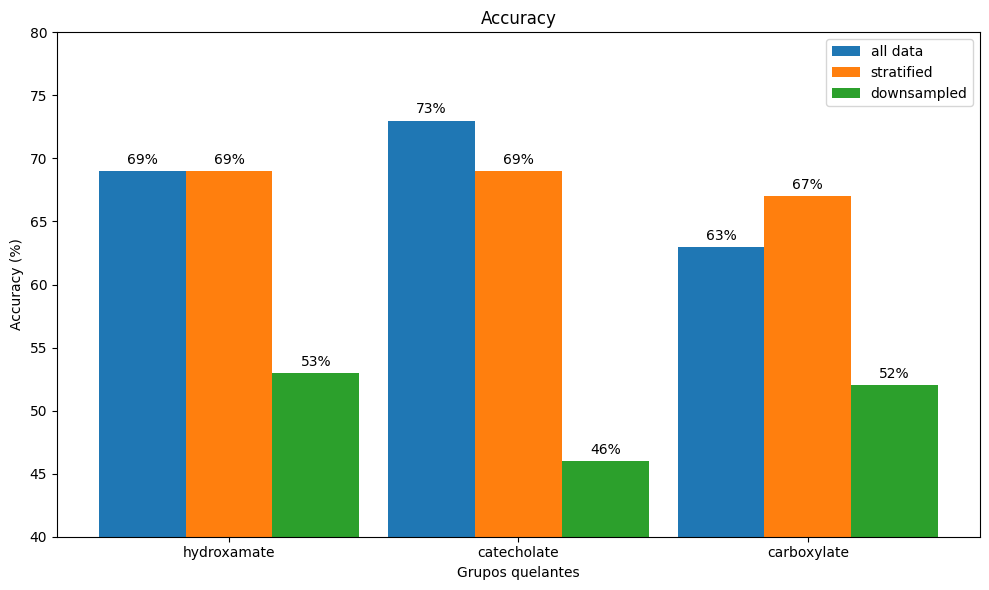

In [27]:
#@title Ploteo de accuracy
acc=[[69,73,63],[69,69,67],[53,46,52]]
columns = ['all data', 'stratified', 'downsampled']
categories = ['hydroxamate', 'catecholate', 'carboxylate']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate through each model's accuracy values
for i, model_acc in enumerate(acc):
    x = [c + i * 0.3 for c in range(len(categories))]  # Adjust the bar positions for each model
    bars = ax.bar(x, model_acc, width=0.3, label=columns[i])
    for bar in bars:
      height = bar.get_height()
      ax.annotate(f'{height}%',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3),  # 3 points vertical offset
        textcoords="offset points",
        ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Grupos quelantes')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Accuracy')
ax.set_xticks([c + 0.3 for c in range(len(categories))])
ax.set_xticklabels(categories)
ax.legend()
ax.set_ylim(40, 80)

# Show plot
plt.tight_layout()
plt.show()

En la sección anterior se puede apreciar la matriz de confusión y reporte de clasificación para cada caso. El accuracy obtenido se muestra en el gráfico.

# Discusiones

En este caso, se obtuvo resultados mucho menores al realizar un downsampling. Esto se debe a que al reducir el número de samples, el dataset resulta siendo demasiado corto para el entrenamiento correcto de la SVM. El efecto de la estratificación para la división de data de entrenamiento y test no es consistente en los casos evaluados.

En este caso, se está evaluando principalmente el accuracy, mientras que la precisión no. Esto se debe a que se está evaluando la presencia o ausencia de grupos y es importante considerar los true positives y true negatives.

# Conclusiones

Para las seeds seleccionadas se obtuvo valores de hasta 59%, 73% y 67% de accuracy para la predicción de la presencia de los grupos hidroxamato, catecolato y carboxilato. Debido al tamaño del dataset, en este caso no es recomendado el uso de técnicas de downsampling.

## Referencias

[1] Byvatov E, Schneider G. Support vector machine applications in bioinformatics. Applied Bioinformatics. 2003 ;2(2):67-77. PMID: 15130823.